In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is in a CSV file named 'your_dataset.csv'
df = pd.read_csv('entri.csv')


In [10]:
# Correct 'Height' column with random integer values between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))

# Verify changes
print(df.head())


            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     162     180   
1    Jae Crowder  Boston Celtics      99       SF   25     176     235   
2   John Holland  Boston Celtics      30       SG   27     160     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     152     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     158     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [11]:
print(df.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     162     180   
1    Jae Crowder  Boston Celtics      99       SF   25     176     235   
2   John Holland  Boston Celtics      30       SG   27     160     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     152     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     158     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [12]:
# Summary statistics for numerical columns
print(df.describe())

           Number         Age      Height      Weight        Salary
count  458.000000  458.000000  458.000000  458.000000  4.470000e+02
mean    17.713974   26.934498  165.489083  221.543668  4.833970e+06
std     15.966837    4.400128    8.958993   26.343200  5.226620e+06
min      0.000000   19.000000  150.000000  161.000000  3.088800e+04
25%      5.000000   24.000000  158.000000  200.000000  1.025210e+06
50%     13.000000   26.000000  165.500000  220.000000  2.836186e+06
75%     25.000000   30.000000  173.000000  240.000000  6.500000e+06
max     99.000000   40.000000  180.000000  307.000000  2.500000e+07


In [13]:
# Check for missing values
print(df.isnull().sum())

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64


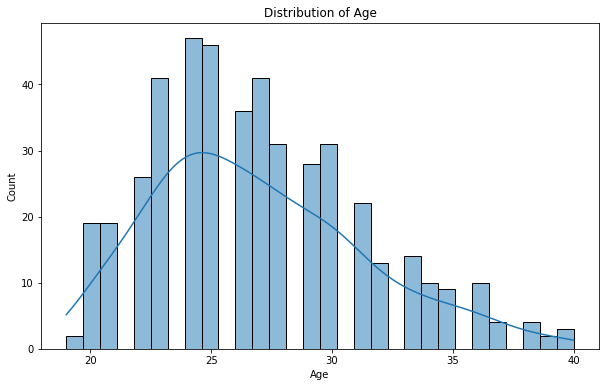

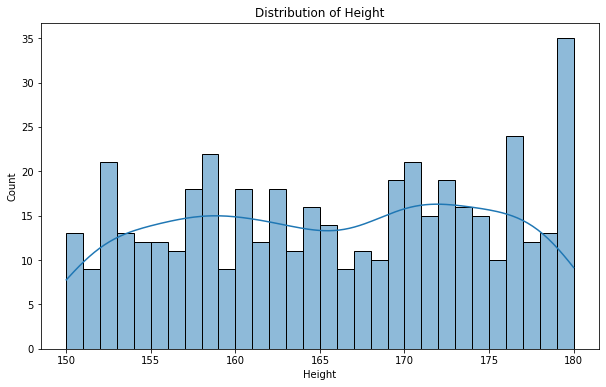

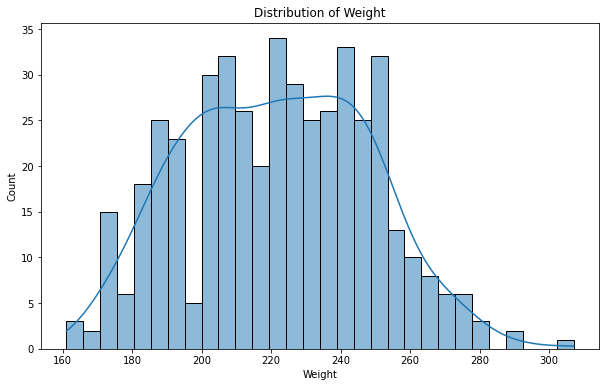

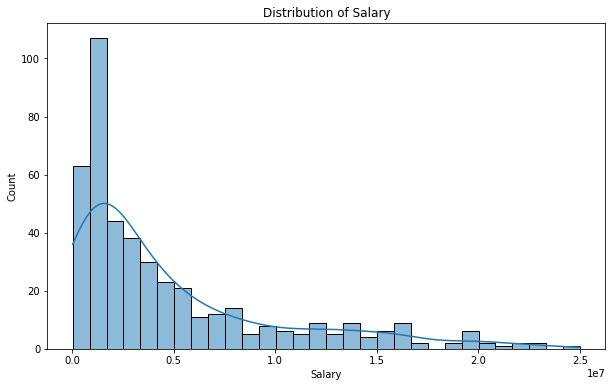

In [14]:
# Visualize distribution of numerical columns
num_cols = ['Age', 'Height', 'Weight', 'Salary']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

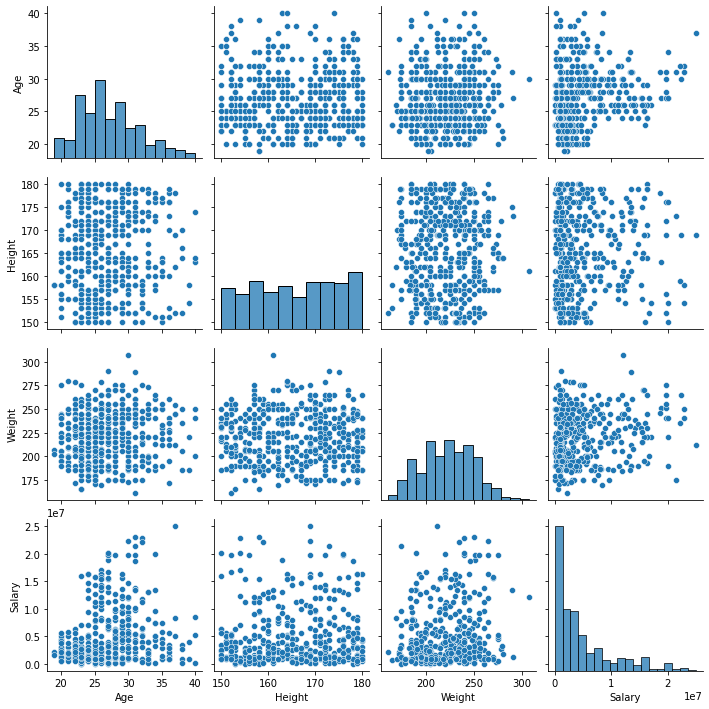

In [15]:
# Visualize relationships between numerical columns
sns.pairplot(df[num_cols])
plt.show()

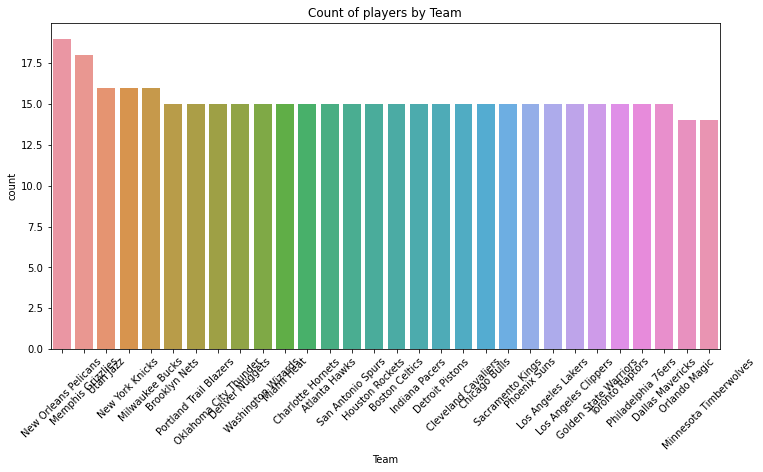

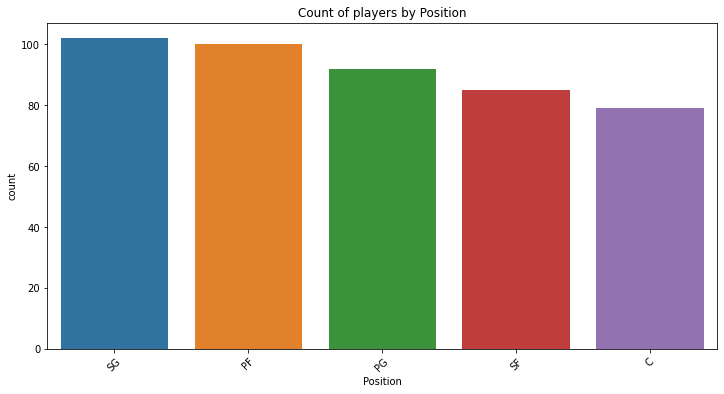

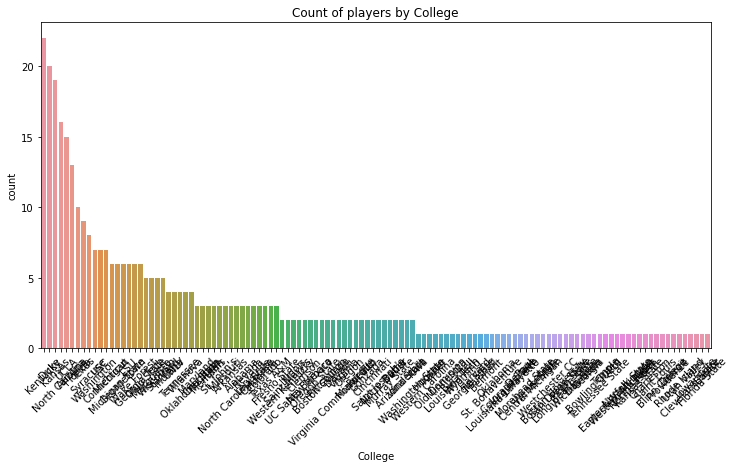

In [16]:
# Visualize categorical columns
cat_cols = ['Team', 'Position', 'College']
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of players by {col}')
    plt.xticks(rotation=45)
    plt.show()

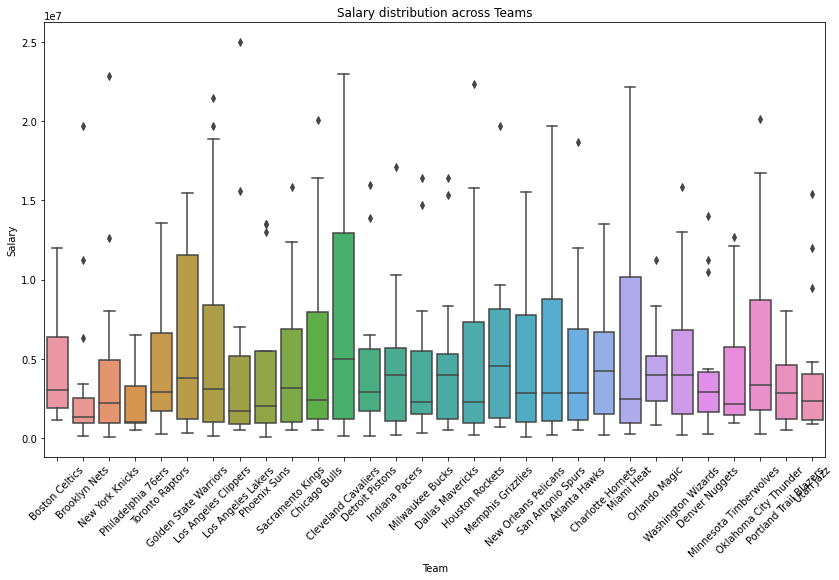

In [17]:
# Explore the relationship between categorical and numerical columns
plt.figure(figsize=(14, 8))
sns.boxplot(x='Team', y='Salary', data=df)
plt.title('Salary distribution across Teams')
plt.xticks(rotation=45)
plt.show()

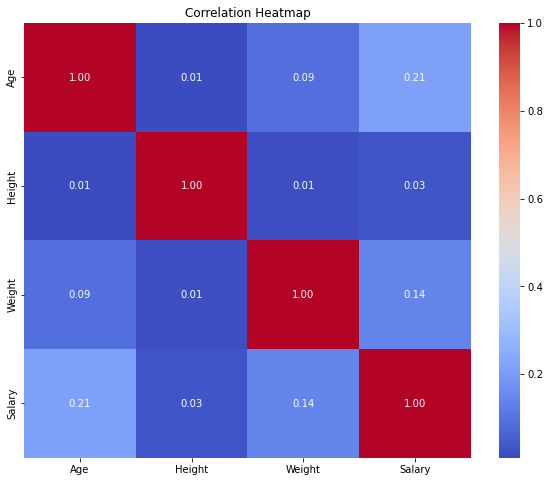

In [18]:
# Correlation heatmap for numerical columns
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Impute missing values for 'College' and 'Salary'
df['College'].fillna('Unknown', inplace=True)
median_salary = df['Salary'].median()
df['Salary'].fillna(median_salary, inplace=True)

In [20]:
print(df.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     162     180   
1    Jae Crowder  Boston Celtics      99       SF   25     176     235   
2   John Holland  Boston Celtics      30       SG   27     160     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     152     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     158     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University  2836186.0  
3      Georgia State  1148640.0  
4            Unknown  5000000.0  


In [21]:
team_counts = df['Team'].value_counts()
team_percentage = (team_counts / len(df)) * 100

print("Number of employees in each Team:")
print(team_counts)
print("\nPercentage splitting with respect to total employees:")
print(team_percentage)

Number of employees in each Team:
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64

Percentage splitting with respect to total employees:
New Orleans Peli

In [22]:
position_counts = df['Position'].value_counts()
print("Employees segregated by Position:")
print(position_counts)


Employees segregated by Position:
SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64


In [23]:
# Assuming age groups like [20-25, 26-30, 31-35, ...]
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
age_groups = pd.cut(df['Age'], bins=bins, right=False)
age_group_counts = age_groups.value_counts()

print("Employees distribution by Age Group:")
print(age_group_counts)


Employees distribution by Age Group:
[25, 30)    182
[20, 25)    152
[30, 35)     90
[35, 40)     29
[40, 45)      3
[45, 50)      0
[50, 55)      0
[55, 60)      0
[60, 65)      0
[65, 70)      0
Name: Age, dtype: int64


In [24]:
team_position_salary = df.groupby(['Team', 'Position'])['Salary'].sum()
highest_spending = team_position_salary.idxmax()

print("Team and Position with the highest spending in terms of Salary:")
print(highest_spending)


Team and Position with the highest spending in terms of Salary:
('Los Angeles Lakers', 'SF')


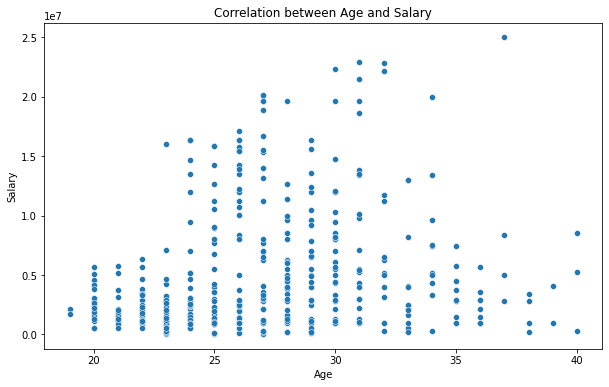

In [25]:
# Scatter plot to visualize correlation between Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Correlation between Age and Salary')
plt.show()
